In [1]:
%matplotlib inline
import os
path = '/root/github/3_SpecialModule'
os.sys.path.append(path)

from Me import *

Sucessful Import Me!!!


# Train Data

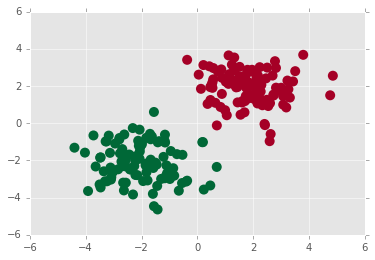

In [2]:
# fake data
n_data = np.ones((100, 2))
x0 = np.random.normal(2*n_data, 1)      # class0 x shape=(100, 2)
y0 = np.zeros(100)                      # class0 y shape=(100, 1)
x1 = np.random.normal(-2*n_data, 1)     # class1 x shape=(100, 2)
y1 = np.ones(100)                       # class1 y shape=(100, 1)
x = np.vstack((x0, x1))  # shape (200, 2) + some noise
y = np.hstack((y0, y1))  # shape (200, )

# plot data
plt.scatter(x[:, 0], x[:, 1], c=y, s=100, lw=0, cmap='RdYlGn')
plt.show()

# Params

In [3]:
learning_rate = 0.05
training_epochs = 100
display_step = 5

# Construct Model

In [6]:
tf_x = tf.placeholder(tf.float32, x.shape)     # input x
tf_y = tf.placeholder(tf.int32, y.shape)     # input y

# neural network layers
l1 = tf.layers.dense(tf_x, 10, tf.nn.relu)      # hidden layer
output = tf.layers.dense(l1, 2)                 # output layer

# Loss + Optimizer

In [7]:
loss = tf.losses.sparse_softmax_cross_entropy(labels=tf_y, logits=output) # compute cost
optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train_op = optimizer.minimize(loss)
# tf.squeeze降维为1
accuracy = tf.metrics.accuracy(labels=tf.squeeze(tf_y), predictions=tf.argmax(output, axis=1),)[1]  # return (acc, update_op), and create 2 local variables

# Initializing the variables

In [8]:
sess = tf.Session()                                                                 # control training and others
init_op = tf.group(tf.global_variables_initializer(), tf.local_variables_initializer())
sess.run(init_op)     # initialize var in graph

# Launch the graph 1

In [9]:
for step in range(100):
    _, l, acc, pred = sess.run([train_op, loss, accuracy, output], {tf_x: x, tf_y: y})
    if step % 20 == 0:
        print('===> step:{:04d}, loss = {:0.9f}, accuracy = {:0.9f}'.format(step + 1, l, acc))

===> step:0001, loss = 1.106404543, accuracy = 0.324999988
===> step:0021, loss = 0.101151846, accuracy = 0.903333306
===> step:0041, loss = 0.055384427, accuracy = 0.950487792
===> step:0061, loss = 0.038944542, accuracy = 0.966721296
===> step:0081, loss = 0.030323148, accuracy = 0.974938273


# Launch the graph 2

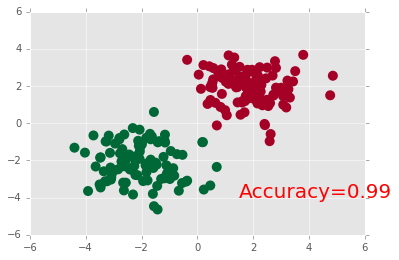

In [10]:
plt.ion()   # something about plotting
plt.show()
for step in range(100):
    # train and net output
    _, acc, pred = sess.run([train_op, accuracy, output], {tf_x: x, tf_y: y})
    if step % 2 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x[:, 0], x[:, 1], c=pred.argmax(1), s=100, lw=0, cmap='RdYlGn')
        plt.text(1.5, -4, 'Accuracy=%.2f' % acc, fontdict={'size': 20, 'color': 'red'})
        plt.pause(0.1)

plt.ioff()
plt.show()